In [1]:
# required for jupyter notebook
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize':(8,6)}) # set sns figure size

import os
import math

In [2]:
def show_corr_heatmap(df):
    # https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

    plt.figure(figsize=(20, 10))

    corr_matrix = df.corr()

    # mask to hide the upper triangle of the symmetric corr-matrix
    # mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

    heatmap = sns.heatmap(

        # correlation matrix
        corr_matrix,

        # mask the top triangle of the matrix
        # mask=mask,

        # two-contrast color, different color for + -
        cmap="PiYG",

        # color map range
        vmin=-1, vmax=1,

        # show corr values in the cells
        annot=True
    )

    # set a title
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=16);

    plt.show()

In [3]:
# read raw csv by marking dropping missing values
missing_values = ['NIL', 'nil', '']
raw_df = pd.read_csv(os.path.join('..', '..', 'Datasets', 'brri-datasets', 'all-station_raw.csv'), 
                     na_values=missing_values)

raw_df.head()

,Station,Year,Month,Day,Max Temp. (degree Celcius),Min Temp. (degree Celcius),Rainfall (mm),Actual Evaporation (mm),"Relative Humidity (morning, %)","Relative Humidity (afternoon, %)",Sunshine (hour/day),Cloudy (hour/day),Solar Radiation (cal/cm^2/day)
0,Barisal,2017,1,1,25.2,13.8,0.0,1.0,94.0,62.0,6.3,4.5,277.72
1,Barisal,2017,1,2,25.4,13.8,0.0,1.0,94.0,62.0,5.5,5.3,257.52
2,Barisal,2017,1,3,25.6,13.4,0.0,1.0,94.0,61.0,6.2,4.6,275.20
3,Barisal,2017,1,4,25.4,14.0,0.0,1.0,94.0,64.0,6.3,4.5,277.72
4,Barisal,2017,1,5,23.0,13.0,0.0,1.0,94.0,68.0,4.0,6.8,219.63


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954 entries, 0 to 4953
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Station                           4954 non-null   object 
 1   Year                              4954 non-null   int64  
 2   Month                             4954 non-null   int64  
 3   Day                               4954 non-null   int64  
 4   Max Temp. (degree Celcius)        4948 non-null   float64
 5   Min Temp. (degree Celcius)        4948 non-null   float64
 6   Rainfall (mm)                     4820 non-null   float64
 7   Actual Evaporation (mm)           4436 non-null   float64
 8   Relative Humidity (morning, %)    4950 non-null   float64
 9   Relative Humidity (afternoon, %)  4918 non-null   float64
 10  Sunshine (hour/day)               4939 non-null   float64
 11  Cloudy (hour/day)                 4767 non-null   float64
 12  Solar 

In [5]:
def show_max_min(_df):
    df = _df.copy()
    for column in df.columns:
        print(f'{column}: max={raw_df[column].max()}, min={raw_df[column].min()}\n')
        
# show_max_min(raw_df)

**Drop invalid datas**
- Drop Max/Min Temp > 50 
- Relative Humidity (afternoon, %) > 100, 
- Sunshine/Cloudy (hour/day) > 24, 
- Solar Radiation (cal/cm^2/day) > 20000 (from the box plot)

In [6]:
# _=raw_df.boxplot(column=['Solar Radiation (cal/cm^2/day)'], vert=False)

In [7]:
raw_df.drop(raw_df.index[raw_df['Max Temp. (degree Celcius)'] > 50], inplace=True)
raw_df.drop(raw_df.index[raw_df['Min Temp. (degree Celcius)'] > 50], inplace=True)
raw_df.drop(raw_df.index[raw_df['Relative Humidity (afternoon, %)'] > 100], inplace=True)
raw_df.drop(raw_df.index[raw_df['Sunshine (hour/day)'] > 24], inplace=True)
raw_df.drop(raw_df.index[raw_df['Cloudy (hour/day)'] > 24], inplace=True)
raw_df.drop(raw_df.index[raw_df['Solar Radiation (cal/cm^2/day)'] > 20000], inplace=True)

In [8]:
# show_max_min(raw_df)

In [9]:
# _=raw_df.boxplot(column=['Solar Radiation (cal/cm^2/day)'], vert=False)

In [10]:
# len(raw_df[raw_df['Solar Radiation (cal/cm^2/day)']>1000])

**Drop 'Solar Radiation (cal/cm^2/day)' > 1000**

In [11]:
raw_df.drop(raw_df.index[raw_df['Solar Radiation (cal/cm^2/day)'] > 1000], inplace=True)

In [12]:
# show_max_min(raw_df)

In [13]:
# _=raw_df.boxplot(column=['Solar Radiation (cal/cm^2/day)'], vert=False)

## Get station-wise dataframes

In [14]:
# read Gazipur raw csv by marking dropping missing values
gazipur_raw_df = raw_df[raw_df['Station']=='Gazipur']

gazipur_raw_df.head()

,Station,Year,Month,Day,Max Temp. (degree Celcius),Min Temp. (degree Celcius),Rainfall (mm),Actual Evaporation (mm),"Relative Humidity (morning, %)","Relative Humidity (afternoon, %)",Sunshine (hour/day),Cloudy (hour/day),Solar Radiation (cal/cm^2/day)
1453,Gazipur,2016,1,1,27.2,14.2,0.0,1.0,89.0,58.0,7.4,NaN,298.96
1454,Gazipur,2016,1,2,27.6,13.0,0.0,2.0,71.0,52.0,6.2,NaN,269.19
1455,Gazipur,2016,1,3,25.7,12.8,0.0,2.0,89.0,58.0,4.8,NaN,234.46
1456,Gazipur,2016,1,4,26.8,14.0,0.0,2.0,84.0,58.0,6.4,NaN,274.15
1457,Gazipur,2016,1,5,26.4,14.8,0.0,2.0,78.0,50.0,5.8,NaN,259.27


In [15]:
# read Rangpur raw csv by marking dropping missing values
rangpur_raw_df = raw_df[raw_df['Station']=='Rangpur']

rangpur_raw_df.head()

,Station,Year,Month,Day,Max Temp. (degree Celcius),Min Temp. (degree Celcius),Rainfall (mm),Actual Evaporation (mm),"Relative Humidity (morning, %)","Relative Humidity (afternoon, %)",Sunshine (hour/day),Cloudy (hour/day),Solar Radiation (cal/cm^2/day)
3280,Rangpur,2017,7,1,33.5,25.3,49.0,2.0,95.0,96.0,0.0,13.5,188.60
3281,Rangpur,2017,7,2,27.5,25.2,37.6,3.0,91.0,84.0,6.0,7.5,381.39
3282,Rangpur,2017,7,3,30.6,26.8,0.0,3.0,83.0,80.0,2.3,11.2,262.50
3283,Rangpur,2017,7,4,30.8,26.2,32.3,3.0,96.0,87.0,0.0,13.5,188.60
3284,Rangpur,2017,7,5,28.8,26.4,0.0,3.0,87.0,80.0,3.3,10.2,294.63


In [16]:
# read Barisal raw csv by marking dropping missing values
barisal_raw_df = raw_df[raw_df['Station']=='Barisal']

barisal_raw_df.head()

,Station,Year,Month,Day,Max Temp. (degree Celcius),Min Temp. (degree Celcius),Rainfall (mm),Actual Evaporation (mm),"Relative Humidity (morning, %)","Relative Humidity (afternoon, %)",Sunshine (hour/day),Cloudy (hour/day),Solar Radiation (cal/cm^2/day)
0,Barisal,2017,1,1,25.2,13.8,0.0,1.0,94.0,62.0,6.3,4.5,277.72
1,Barisal,2017,1,2,25.4,13.8,0.0,1.0,94.0,62.0,5.5,5.3,257.52
2,Barisal,2017,1,3,25.6,13.4,0.0,1.0,94.0,61.0,6.2,4.6,275.20
3,Barisal,2017,1,4,25.4,14.0,0.0,1.0,94.0,64.0,6.3,4.5,277.72
4,Barisal,2017,1,5,23.0,13.0,0.0,1.0,94.0,68.0,4.0,6.8,219.63


In [17]:
# read Habiganj raw csv by marking dropping missing values
habiganj_raw_df = raw_df[raw_df['Station']=='Habiganj']

habiganj_raw_df.head()

,Station,Year,Month,Day,Max Temp. (degree Celcius),Min Temp. (degree Celcius),Rainfall (mm),Actual Evaporation (mm),"Relative Humidity (morning, %)","Relative Humidity (afternoon, %)",Sunshine (hour/day),Cloudy (hour/day),Solar Radiation (cal/cm^2/day)
4407,Habiganj,2019,1,1,27.8,12.8,0.0,NaN,84.0,72.0,8.8,1.9,331.38
4408,Habiganj,2019,1,2,27.1,13.2,0.0,NaN,89.0,74.0,7.8,2.9,306.74
4409,Habiganj,2019,1,3,27.2,13.5,0.0,NaN,94.0,59.0,8.5,2.2,323.98
4410,Habiganj,2019,1,4,26.2,15.5,0.0,NaN,89.0,70.0,8.4,2.3,321.52
4411,Habiganj,2019,1,5,20.5,12.8,0.0,NaN,84.0,58.0,8.7,2.0,328.91


In [18]:
def get_val_freq_map(df, column):
    '''
    get map of value counts of a dataframe for a particular column
    '''
    mp = {}
    for val in raw_df[column]:
        if val in mp:
            mp[val]+=1
        else:
            mp[val]=1
    return mp

# Analyze all station Rainfall data

In [19]:
rainfall_column = 'Rainfall (mm)'

In [20]:
rainfall_df = raw_df[[rainfall_column]].copy()
rainfall_df.head()

,Rainfall (mm)
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [21]:
rainfall_df.value_counts()

Rainfall (mm)
0.0              3243
2.0                46
1.0                36
1.2                34
0.6                32
                 ... 
40.2                1
40.5                1
40.6                1
40.8                1
265.0               1
Length: 390, dtype: int64

In [22]:
print(rainfall_df.max())

Rainfall (mm)    265.0
dtype: float64


<AxesSubplot:>

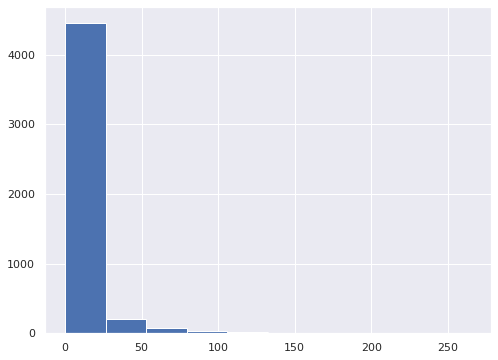

In [23]:
rainfall_df[rainfall_column].hist(bins=10)

In [24]:
def group_column_vals(df, column, diff=10):
    group_labels = []
    group_freqs = []

    length = math.ceil(df[column].max()/diff)

    for i in range(length+1):
        group_freqs.append(0)
        if i==0:
            group_labels.append('0')
        else:
            group_labels.append(str(1+(i-1)*diff) + '-' + str(i*diff))

    for val in df[column]:
        if math.isnan(val):
            continue
        group_freqs[math.ceil(val/diff)]+=1
    
    mp = {}
    total_freq = sum(group_freqs)
    for i in range(length+1):
        # store percantage of each group
        mp[group_labels[i]] = round((group_freqs[i]/total_freq) * 100, 2) 
        
    return mp

In [25]:
group_column_vals(df=rainfall_df, column=rainfall_column, diff=20)

{'0': 67.87,
 '1-20': 22.85,
 '21-40': 5.53,
 '41-60': 1.82,
 '61-80': 1.0,
 '81-100': 0.44,
 '101-120': 0.25,
 '121-140': 0.1,
 '141-160': 0.06,
 '161-180': 0.02,
 '181-200': 0.02,
 '201-220': 0.0,
 '221-240': 0.0,
 '241-260': 0.0,
 '261-280': 0.02}

## Analyze Staion-wise Rainfall

### Gazipur

In [26]:
gazipur_rainfall_df = gazipur_raw_df[[rainfall_column]].copy()
# gazipur_rainfall_df.head()

<AxesSubplot:>

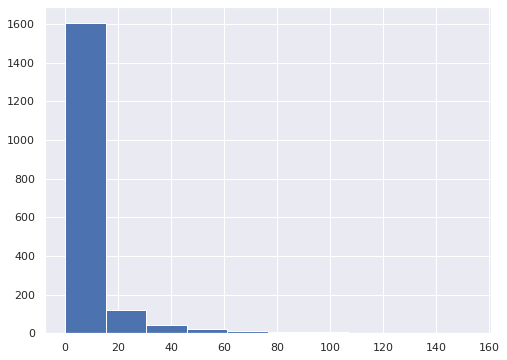

In [27]:
gazipur_rainfall_df[rainfall_column].hist(bins=10)

In [28]:
group_column_vals(gazipur_rainfall_df, rainfall_column, 20)

{'0': 66.19,
 '1-20': 25.33,
 '21-40': 5.23,
 '41-60': 1.82,
 '61-80': 0.72,
 '81-100': 0.39,
 '101-120': 0.17,
 '121-140': 0.11,
 '141-160': 0.06}

### Rangpur

In [29]:
rangpur_rainfall_df = rangpur_raw_df[[rainfall_column]].copy()
# rangpur_rainfall_df.head()

<AxesSubplot:>

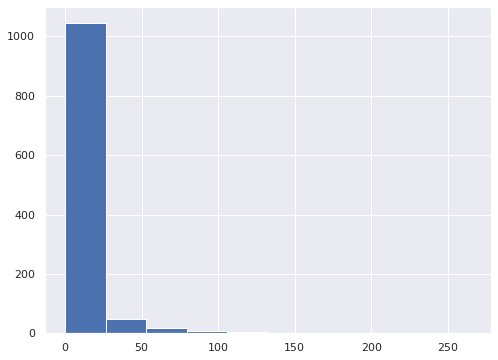

In [30]:
rangpur_rainfall_df[rainfall_column].hist(bins=10)

In [31]:
group_column_vals(rangpur_rainfall_df, rainfall_column, 20)

{'0': 71.47,
 '1-20': 17.96,
 '21-40': 6.22,
 '41-60': 1.96,
 '61-80': 1.24,
 '81-100': 0.62,
 '101-120': 0.27,
 '121-140': 0.09,
 '141-160': 0.09,
 '161-180': 0.0,
 '181-200': 0.0,
 '201-220': 0.0,
 '221-240': 0.0,
 '241-260': 0.0,
 '261-280': 0.09}

### Barisal

In [32]:
barisal_rainfall_df = barisal_raw_df[[rainfall_column]].copy()
# barisal_rainfall_df.head()

<AxesSubplot:>

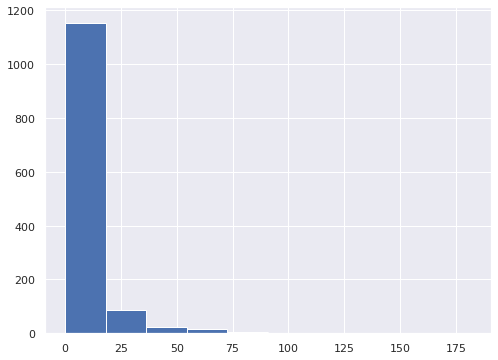

In [33]:
barisal_rainfall_df[rainfall_column].hist(bins=10)

In [34]:
group_column_vals(barisal_rainfall_df, rainfall_column, 20)

{'0': 63.81,
 '1-20': 26.91,
 '21-40': 5.8,
 '41-60': 1.78,
 '61-80': 0.93,
 '81-100': 0.31,
 '101-120': 0.23,
 '121-140': 0.08,
 '141-160': 0.08,
 '161-180': 0.0,
 '181-200': 0.08}

### Habiganj

In [35]:
habiganj_rainfall_df = habiganj_raw_df[[rainfall_column]].copy()
# habiganj_rainfall_df.head()

<AxesSubplot:>

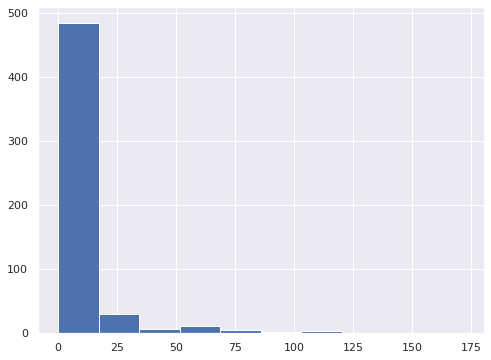

In [36]:
habiganj_rainfall_df[rainfall_column].hist(bins=10)

In [37]:
group_column_vals(habiganj_rainfall_df, rainfall_column, 20)

{'0': 75.74,
 '1-20': 15.07,
 '21-40': 4.41,
 '41-60': 1.65,
 '61-80': 1.65,
 '81-100': 0.55,
 '101-120': 0.55,
 '121-140': 0.18,
 '141-160': 0.0,
 '161-180': 0.18}

## Analyze Rainfall Per Year

In [38]:
raw_df_2016 = raw_df[raw_df['Year']==2016]
raw_df_2017 = raw_df[raw_df['Year']==2017]
raw_df_2018 = raw_df[raw_df['Year']==2018]
raw_df_2019 = raw_df[raw_df['Year']==2019]
raw_df_2020 = raw_df[raw_df['Year']==2020]

# raw_df_2020.head()

### Year 2016

In [39]:
# raw_df_2016[rainfall_column].hist(bins=10)

In [40]:
group_column_vals(raw_df_2016, rainfall_column, 20)

{'0': 67.96,
 '1-20': 24.59,
 '21-40': 5.52,
 '41-60': 1.1,
 '61-80': 0.28,
 '81-100': 0.28,
 '101-120': 0.0,
 '121-140': 0.28}

### Year 2017

In [41]:
# raw_df_2017[rainfall_column].hist(bins=10)

In [42]:
group_column_vals(raw_df_2017, rainfall_column, 20)

{'0': 64.49,
 '1-20': 24.87,
 '21-40': 5.32,
 '41-60': 2.66,
 '61-80': 1.73,
 '81-100': 0.27,
 '101-120': 0.4,
 '121-140': 0.13,
 '141-160': 0.0,
 '161-180': 0.0,
 '181-200': 0.13}

### Year 2018

In [43]:
# raw_df_2018[rainfall_column].hist(bins=10)

In [44]:
group_column_vals(raw_df_2018, rainfall_column, 20)

{'0': 65.25,
 '1-20': 24.9,
 '21-40': 7.26,
 '41-60': 1.14,
 '61-80': 0.73,
 '81-100': 0.52,
 '101-120': 0.1,
 '121-140': 0.0,
 '141-160': 0.1}

### Year 2019

In [45]:
# raw_df_2019[rainfall_column].hist(bins=10)

In [46]:
group_column_vals(raw_df_2019, rainfall_column, 20)

{'0': 70.16,
 '1-20': 21.18,
 '21-40': 5.42,
 '41-60': 1.34,
 '61-80': 0.91,
 '81-100': 0.49,
 '101-120': 0.21,
 '121-140': 0.14,
 '141-160': 0.07,
 '161-180': 0.07}

### Year 2020

In [47]:
# raw_df_2020[rainfall_column].hist(bins=10)

In [48]:
group_column_vals(raw_df_2020, rainfall_column, 20)

{'0': 69.27,
 '1-20': 21.5,
 '21-40': 4.46,
 '41-60': 2.58,
 '61-80': 1.09,
 '81-100': 0.47,
 '101-120': 0.39,
 '121-140': 0.08,
 '141-160': 0.08,
 '161-180': 0.0,
 '181-200': 0.0,
 '201-220': 0.0,
 '221-240': 0.0,
 '241-260': 0.0,
 '261-280': 0.08}

## Monthly Rainfall Analysis

In [49]:
raw_df_month = raw_df[raw_df['Month'].isin([5,6,7,8])] 
raw_df_month.head()

,Station,Year,Month,Day,Max Temp. (degree Celcius),Min Temp. (degree Celcius),Rainfall (mm),Actual Evaporation (mm),"Relative Humidity (morning, %)","Relative Humidity (afternoon, %)",Sunshine (hour/day),Cloudy (hour/day),Solar Radiation (cal/cm^2/day)
120,Barisal,2017,5,1,34.4,2.6,5.0,5.0,95.0,62.0,9.2,4.0,486.25
121,Barisal,2017,5,2,33.6,20.8,0.0,3.0,95.0,59.0,9.3,3.9,489.50
122,Barisal,2017,5,3,35.0,23.0,0.0,3.0,96.0,59.0,8.8,4.4,473.23
123,Barisal,2017,5,4,35.2,26.0,0.0,2.0,96.0,62.0,9.3,3.9,489.50
124,Barisal,2017,5,5,34.4,26.2,0.0,4.0,96.0,NaN,6.9,6.3,411.38


In [50]:
# raw_df_month[rainfall_column].hist(bins=10)

In [51]:
group_column_vals(raw_df_month, rainfall_column, 15)

{'0': 43.5,
 '1-15': 34.54,
 '16-30': 11.07,
 '31-45': 4.69,
 '46-60': 2.41,
 '61-75': 1.74,
 '76-90': 1.14,
 '91-105': 0.42,
 '106-120': 0.36,
 '121-135': 0.06,
 '136-150': 0.0,
 '151-165': 0.0,
 '166-180': 0.06}

# Correlation Heatmap

### Whole dataset

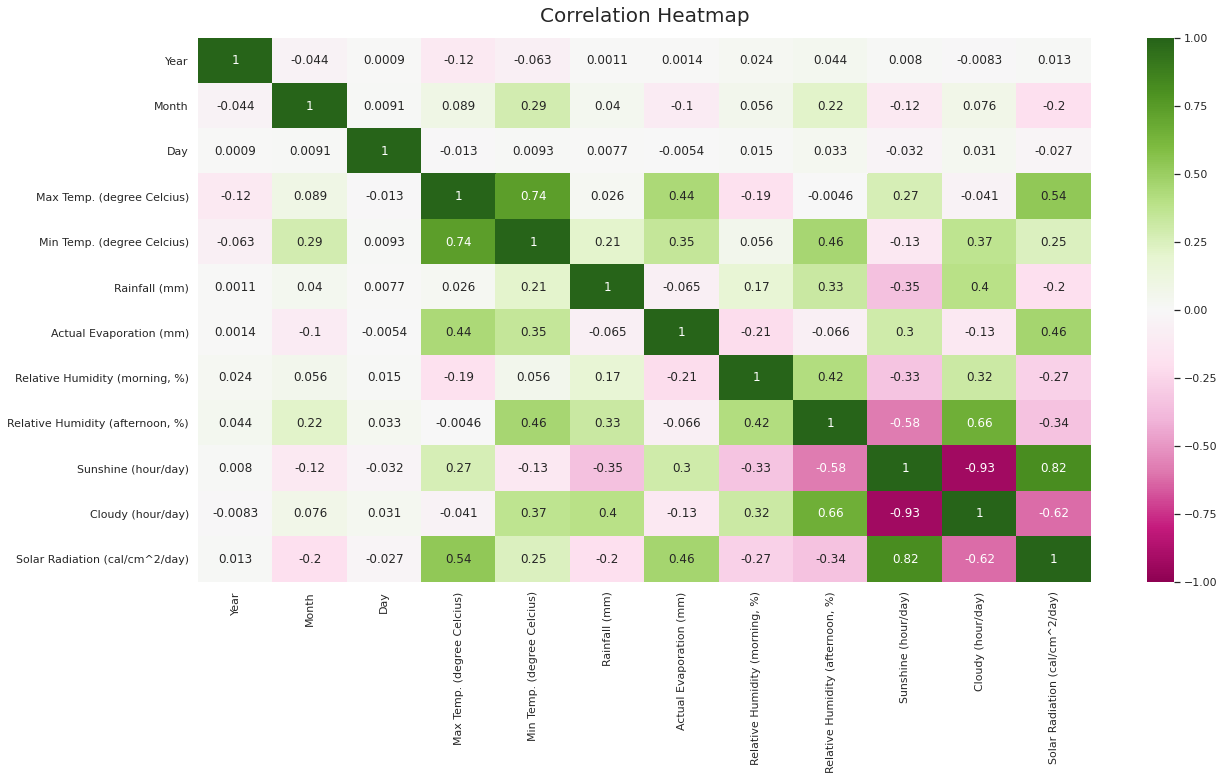

In [52]:
show_corr_heatmap(raw_df)

### Monthly dataset

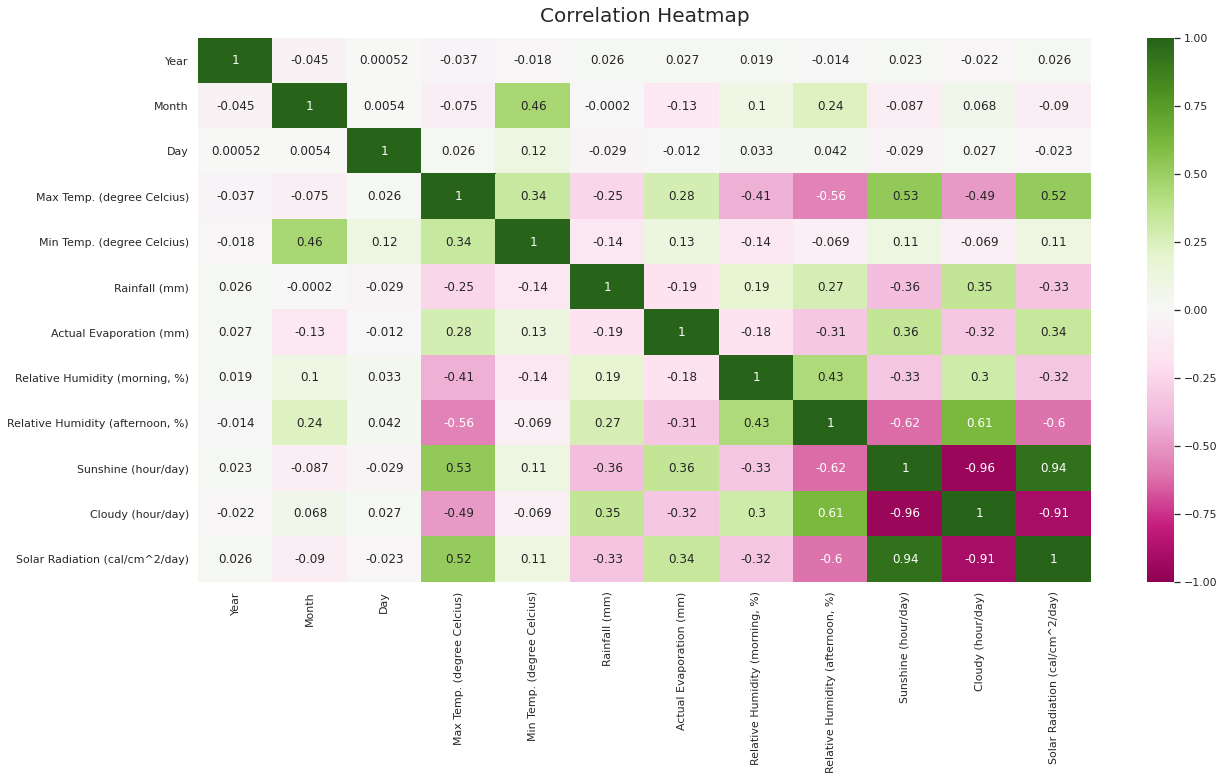

In [53]:
show_corr_heatmap(raw_df_month)

# Scatter plots

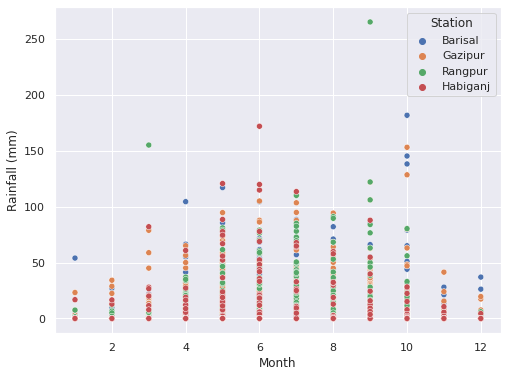

In [54]:
_=sns.scatterplot(data=raw_df, x='Month', y=rainfall_column, hue='Station')

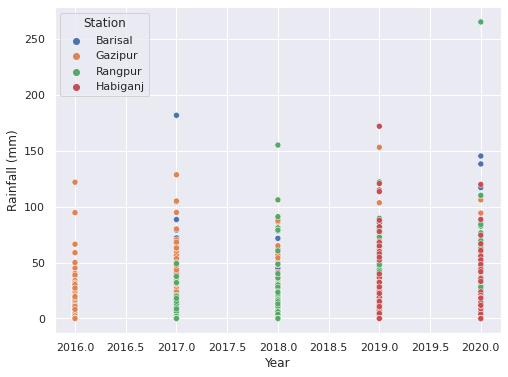

In [55]:
_=sns.scatterplot(data=raw_df, x='Year', y=rainfall_column, hue='Station')

In [56]:
# sns.pairplot(raw_df[['Rainfall (mm)', 'Month', 'Station']], hue = 'Station', height = 5)